In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

## General settings

In [ ]:
usePreloadedData = False # True to load pre-prepared dataset , False to load directly from eirgrid data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/CA683Project')


# Eirgrid Wind generation
http://smartgriddashboard.eirgrid.com/#all

In [ ]:
if usePreloadedData == False:
  # Wind energy Actual and Prediction
  
  sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2018%2000:00&dateto=31-Jan-2018%2023:59'

  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-'
  url_mid = '%2000:00&dateto='
  url_end = '%2023:59'

  years = ['2017', '2018', '2019', '2020']
  months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  endDay= [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
  tempds = []
  months_years = []

  for year in years:
    i = 0
    for month in months:
      url = url_base + month + '-' + year + url_mid + str(endDay[i]) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


  wgds = pd.concat(tempds, keys=months_years)
  
  wgds = wgds.reset_index()
  wgds = wgds.drop('level_0', axis=1)
  wgds = wgds.drop('level_1', axis=1)
  wgds = wgds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Jul-2017%2000:00&datet

# Eirgrid Actual System Generation

In [ ]:
if usePreloadedData == False:
  # Wind energy Actual and Prediction
  sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=23-Jan-2021%2000:00&dateto=21-Feb-2021%2001:15'

  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-'

  tempds = []
  months_years = []

  for year in years:
    i = 0
    for month in months:
      url = url_base + month + '-' + year + url_mid + str(endDay[i]) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


  sgds = pd.concat(tempds, keys=months_years)
  
  sgds = sgds.reset_index()
  sgds = sgds.drop('level_0', axis=1)
  sgds = sgds.drop('level_1', axis=1)
  sgds = sgds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&reg

# System Demand: Actual and Prediction

### Data description
* **System Demand** - represents the predicted electricity production required to meet national consumption.
* **Sdate** - 
* **SREGION** - 
* **SActualDemandMW** - 
* **SFORECAST DEMAND(MW)** - 
* **SFORECAST WIND(MW)** - 
* **SActualWindMW** - 
* **Shour** - 
* **Sisweekday** - 
* **Smonth** - 
  
Actual and forecast System Demand are shown in **15 minute intervals.**

The data came from EirGrid Group about all island power systems and has been prepared by us for further analysis.

Source: https://smartgriddashboard.eirgrid.com/#all/demand

In [ ]:
if usePreloadedData == False:
  # Demand Actual and Prediction
  sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=18-Jan-2021%2000:00&dateto=16-Feb-2021%2023:59'
  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-'

  i = 0
  tempds = []

  for year in years:
    i = 0
    for month in months:
      url = url_base + month + '-' + year + url_mid + str(endDay[i]) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)

  sdds = pd.concat(tempds, keys=months_years)
  sdds = sdds.reset_index()
  sdds = sdds.drop('level_0', axis=1)
  sdds = sdds.drop('level_1', axis=1)
  sdds = sdds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Jul-2017

# Merge CSV to have all data based on Date and Region: All Island

In [ ]:
if usePreloadedData == False:
  left = sdds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  middle = wgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  right = sgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  #right.index = right.index.tz_convert(None)

  newdf = left.join(middle)
  newdf = newdf.join(right)
  newdf = newdf.reset_index()
  newdf["hour"] = 0
  newdf["isweekday"] = False
  newdf["month"] = 0

  def settimeatt(row):
      row["hour"] = row.date.hour
      row["isweekday"] = (row.date.isoweekday() < 6) 
      row["month"] = row.date.month
      return row
  newdf = newdf.apply(settimeatt, axis='columns')

  newdf = newdf.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
  newdf = newdf.rename(columns={'  ACTUAL WIND(MW)' : 'ActualWindMW'})
  newdf = newdf.rename(columns={'   ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})
  newdf.to_csv("IslandElectricity2017-2020.csv") 
else:
  fileP = '/content/drive/MyDrive/CA683Project/IslandElectricity2020.csv'
  newdf = pd.read_csv(fileP)
  
newdf.head()

date  Year Month  ... hour isweekday  month
0 2017-01-01 00:00:00  2017   Jan  ...    0     False      1
1 2017-01-01 00:15:00  2017   Jan  ...    0     False      1
2 2017-01-01 00:30:00  2017   Jan  ...    0     False      1
3 2017-01-01 00:45:00  2017   Jan  ...    0     False      1
4 2017-01-01 01:00:00  2017   Jan  ...    1     False      1

[5 rows x 13 columns]

In [ ]:
newdf.describe()

Year         Month  ...   FORECAST WIND(MW)  ActualWindMW
count  35044.0  35044.000000  ...        35040.000000  34993.000000
mean    2017.0      6.526424  ...          804.550885    824.275684
std        0.0      3.447903  ...          600.371524    603.641575
min     2017.0      1.000000  ...            9.000000     -4.000000
25%     2017.0      4.000000  ...          290.000000    312.000000
50%     2017.0      7.000000  ...          664.000000    711.000000
75%     2017.0     10.000000  ...         1220.000000   1250.000000
max     2017.0     12.000000  ...         2436.000000   2624.000000

[8 rows x 6 columns]

In [ ]:
#Krystian: Checking how many months do we have in our dataset (if the year is complete)
newdf.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
#Krystian: Looking for maximal extreme values
print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.tail()

-----------DATA SIZE -------------
(35044, 10)
Rows:  35044 , Columns:  10
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35044 entries, 0 to 35043
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            35044 non-null  int64  
 1   date                  35044 non-null  object 
 2    REGION               35044 non-null  object 
 3   ActualDemandMW        35039 non-null  float64
 4    FORECAST DEMAND(MW)  0 non-null      float64
 5    FORECAST WIND(MW)    35040 non-null  float64
 6   ActualWindMW          35039 non-null  float64
 7   hour                  35044 non-null  int64  
 8   isweekday             35044 non-null  bool   
 9   month                 35044 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 2.4+ MB
None
-----------DATA MAX Values -------------
-----------DATA COLUMNS-------------
['Unnamed: 0', 

Unnamed: 0                 date      REGION  ...  hour  isweekday  month
35039       35039  2020-12-31 22:45:00  All Island  ...    22       True     12
35040       35040  2020-12-31 23:00:00  All Island  ...    23       True     12
35041       35041  2020-12-31 23:15:00  All Island  ...    23       True     12
35042       35042  2020-12-31 23:30:00  All Island  ...    23       True     12
35043       35043  2020-12-31 23:45:00  All Island  ...    23       True     12

[5 rows x 10 columns]

# Visualisations

In [ ]:
import plotly.express as px

fig = px.scatter(newdf, x='date', y='ActualDemandMW')
fig.show()

In [ ]:
# import plotly.express as px
# Krystian: Checking hourly utilisation of the energy in each month
# Visible outliers

fig2 = px.scatter(newdf, x='hour', y='ActualDemandMW', color='month')
fig2.show()

In [ ]:
# Krystian: Checking Forecast Wind in MW vs number of measurement of Actual Wind on weekdays vs weekends
# ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', ' FORECAST WIND(MW)', 'ActualWindMW', 'hour', 'isweekday', 'month']
fig3 = px.histogram(newdf, x='ActualWindMW', y=' FORECAST WIND(MW)', color='isweekday',
            title="Checking Forecast Wind in MW vs number of measurement of Actual Wind on weekdays vs weekends",
            width=800, height=600,
            template="simple_white"
            )
fig3.show()

In [ ]:
# Krystian: 
# ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', ' FORECAST WIND(MW)', 'ActualWindMW', 'hour', 'isweekday', 'month']

# year = pd.DatetimeIndex(newdf['date']).year.unique()
# month = pd.DatetimeIndex(newdf['date']).month.unique()
# pd.DatetimeIndex(newdf['date']).day.unique()

# fig4 = px.box(newdf, x='month', y="ActualDemandMW") #points='all')
fig4 = px.box(newdf, x='month', y="ActualDemandMW", color="isweekday",
             notched=True,
             title="Actual Demand measured in MW each month by type of the day",
             hover_data=["ActualDemandMW"]
            )
fig4.show()

In [ ]:
# Krystian: 
# ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', ' FORECAST WIND(MW)', 'ActualWindMW', 'hour', 'isweekday', 'month']

val = ['month', 'ActualDemandMW', 'ActualWindMW', 'hour']

one_mth = newdf.loc[pd.DatetimeIndex(newdf['date']).month == 12]
fig5 = px.parallel_coordinates(one_mth, color="hour", dimensions=val, title="Analysis of December housely usage")

# fig5 = px.parallel_coordinates(newdf['ActualDemandMW','ActualWindMW'], color=newdf['month'], 
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
fig5.show()

In [ ]:
fig = px.scatter(newdf, x='hour', y='ActualDemandMW', facet_col='isweekday')
fig.show()

In [ ]:
fig = px.scatter(newdf, x='hour', y='ActualDemandMW', facet_col='month', color='isweekday')
fig.show()

In [ ]:

fig = px.scatter(newdf, x='date', y='ActualWindMW')
fig.show()

# Load Weather Data
Load prepared Weather data from weather stations: Belmullet (suffix _BEL), Dublin Airport (_DUB), Shannon Airport (No suffix) and Cork Airport (suffix _COR)

For each station, for example Cork Airport, please see the on https://data.gov.ie/dataset/cork-airport-hourly-data :

Hourly Elements:

| ID | ELEMENT | Unit |
| --- | --- | --- |       
|rain|Precipitation Amount|mm|
|**temp**|Air Temperature|°C|
| wetb|	Wet Bulb Air Temperature|  °C|
|dewpt| Dew Point Air Temperature|	°C	|	
|vappr|	Vapour Pressure	|		hpa|
|rhum	|	Relative Humidity	|	%|
|msl	|	Mean Sea Level Pressure				|		hPa|
|**wdsp**	|	Mean Hourly Wind Speed		|		kt|
|wddir|	Predominant Hourly wind Direction	|	kt|
|ww		Synop Code Present Weather - decode below
|w		Synop Code Past Weather - decode below
|sun		Sunshine duration						hours
|vis		Visibility							m
|clht		Cloud Ceiling Height - if none value is 999			100s feet
|clamt		Cloud Amount							okta

In [ ]:
weatherds = pd.read_csv("IrelandWeatherData.csv")

weatherds

date  ind_BEL  rain_BEL  ...  vis_COR  clht_COR  clamt_COR
0     2020-01-01 00:00:00        0       0.0  ...     6000        23          7
1     2020-01-01 01:00:00        0       0.0  ...    20000        23          7
2     2020-01-01 02:00:00        0       0.0  ...    20000        22          7
3     2020-01-01 03:00:00        0       0.0  ...    20000        22          7
4     2020-01-01 04:00:00        0       0.0  ...    20000        22          7
...                   ...      ...       ...  ...      ...       ...        ...
9524  2021-01-31 20:00:00        0       0.0  ...      300         2          8
9525  2021-01-31 21:00:00        0       0.0  ...      300         2          8
9526  2021-01-31 22:00:00        0       0.6  ...      200         2          8
9527  2021-01-31 23:00:00        0       0.1  ...      500         2          8
9528  2021-02-01 00:00:00        0       0.0  ...     4000         2          8

[9529 rows x 81 columns]

In [ ]:
weatherds.describe()

ind_BEL     rain_BEL  ind.1_BEL  ...      sun_COR     clht_COR    clamt_COR
count   9529.0  9529.000000     9529.0  ...  9529.000000  9529.000000  9529.000000
mean       0.0     0.175254        0.0  ...     0.174478   306.974289     5.463322
std        0.0     0.501723        0.0  ...     0.334504   430.109393     2.431804
min        0.0     0.000000        0.0  ...     0.000000     1.000000     0.000000
25%        0.0     0.000000        0.0  ...     0.000000    10.000000     3.000000
50%        0.0     0.000000        0.0  ...     0.000000    38.000000     7.000000
75%        0.0     0.100000        0.0  ...     0.100000   999.000000     7.000000
max        0.0     7.500000        0.0  ...     1.000000   999.000000     8.000000

[8 rows x 73 columns]

In [ ]:

# Reduce timeframe
weatherds = weatherds[(weatherds.date >= "2020-01-01 00:00:00") & (weatherds.date < "2021-01-01 14:45:00")]

In [ ]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Belmullet"))


fig.add_trace(go.Scatter(x=weatherds['date'], y=weatherds['wdsp'],
                    mode='lines',
                    name='Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=weatherds['date'], y=weatherds['temp'],
                    mode='lines',
                    name='Temperature',showlegend=True), 1, 1, secondary_y=True)


fig.update_layout(
    title_text="Wind speed vs. Temperatures",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=4000,
    height=500
)
fig.show()

# Merge datasets and EDA

In [ ]:
right = newdf.set_index(['date'])
left = weatherds.set_index(['date'])
newdf = left.join(right)

newdf = newdf.reset_index()

In [ ]:
newdf.columns

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'ind.3_BEL', 'wdsp_BEL', 'ind.4_BEL', 'wddir_BEL', 'ww_BEL', 'w_BEL',
       'sun_BEL', 'vis_BEL', 'clht_BEL', 'clamt_BEL', 'ind_DUB', 'rain_DUB',
       'ind.1_DUB', 'temp_DUB', 'ind.2_DUB', 'wetb_DUB', 'dewpt_DUB',
       'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'ind.3_DUB', 'wdsp_DUB',
       'ind.4_DUB', 'wddir_DUB', 'ww_DUB', 'w_DUB', 'sun_DUB', 'vis_DUB',
       'clht_DUB', 'clamt_DUB', 'ind', 'rain', 'ind.1', 'temp', 'ind.2',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4',
       'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'ind_COR',
       'rain_COR', 'ind.1_COR', 'temp_COR', 'ind.2_COR', 'wetb_COR',
       'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR', 'ind.3_COR',
       'wdsp_COR', 'ind.4_COR', 'wddir_COR', 'ww_COR', 'w_COR', 'sun_COR',
       'vis_COR', 'clht_COR', 'clamt_COR', 'Unnamed: 0', ' RE

In [ ]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("newdf"))


fig.add_trace(go.Scatter(x=newdf['date'], y=(newdf['wdsp_COR']^2),
                    mode='lines',
                    name='Wind Speed ^ 2',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=newdf['date'], y=(newdf['ActualWindMW']),
                    mode='lines',
                    name='Wind Generation',showlegend=True), 1, 1, secondary_y=True)


fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=2000,
    height=500
)
fig.show()

In [ ]:
newdf.columns

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'ind.3_BEL', 'wdsp_BEL', 'ind.4_BEL', 'wddir_BEL', 'ww_BEL', 'w_BEL',
       'sun_BEL', 'vis_BEL', 'clht_BEL', 'clamt_BEL', 'ind_DUB', 'rain_DUB',
       'ind.1_DUB', 'temp_DUB', 'ind.2_DUB', 'wetb_DUB', 'dewpt_DUB',
       'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'ind.3_DUB', 'wdsp_DUB',
       'ind.4_DUB', 'wddir_DUB', 'ww_DUB', 'w_DUB', 'sun_DUB', 'vis_DUB',
       'clht_DUB', 'clamt_DUB', 'ind', 'rain', 'ind.1', 'temp', 'ind.2',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4',
       'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'ind_COR',
       'rain_COR', 'ind.1_COR', 'temp_COR', 'ind.2_COR', 'wetb_COR',
       'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR', 'ind.3_COR',
       'wdsp_COR', 'ind.4_COR', 'wddir_COR', 'ww_COR', 'w_COR', 'sun_COR',
       'vis_COR', 'clht_COR', 'clamt_COR', 'Unnamed: 0', ' RE

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text major ticklabel objects>)

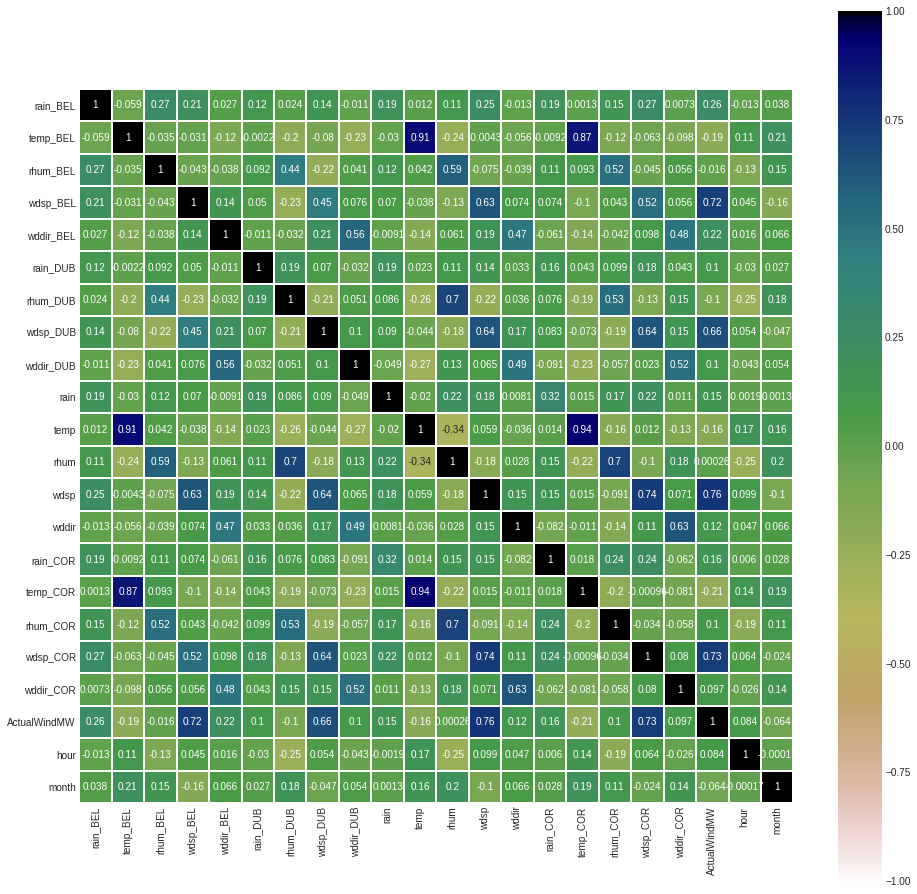

In [ ]:
col_list_numerical = ['rain_BEL', 'temp_BEL', 
       'rhum_BEL', 'wdsp_BEL', 'wddir_BEL', 'rain_DUB',
       'rhum_DUB', 'wdsp_DUB',
       'wddir_DUB', 'rain', 'temp', 'rhum', 'wdsp',
       'wddir', 
       'rain_COR', 'temp_COR', 'rhum_COR',
       'wdsp_COR', 'wddir_COR',  
       'ActualWindMW', 'hour', 'isweekday', 'month']

df_corr = newdf[col_list_numerical].corr()

plt.figure(figsize=[16, 16])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Electricity Generation by fuel type

Data from https://www.seai.ie/data-and-insights/seai-statistics/monthly-energy-data/electricity/

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/CA683Project')
  
filename = '/content/drive/MyDrive/Colab_Notebooks/CA683Project/Electricity_Monthly_Timeseries_transposed.csv'
eGen = pd.read_csv(filename)

eGen.head()

Mounted at /content/drive


Date  ...  Total Generated Less Pumped Hydro Storage Losses
0  Jan-10  ...                                            2624.2
1  Feb-10  ...                                            2336.2
2  Mar-10  ...                                            2431.9
3  Apr-10  ...                                            2126.1
4  May-10  ...                                            2095.1

[5 rows x 22 columns]

In [ ]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Electricity Generation by fuel type"))

fig.add_trace(go.Scatter(x=eGen['Date'], y=(eGen['Wind']),
                    mode='lines',
                    name='Wind',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=eGen['Date'], y=(eGen['Total Generation']),
                    mode='lines',
                    name='Total Generation',showlegend=True), 1, 1, secondary_y=True)